In our 'explore_dates.py' we've tried a number of models and a number of different training durations for each. In this notebook we'll explore if any of them are any good.

In [6]:
import os
import pickle

x_test = pickle.load(open("models/d+1_x_test.pkl","rb"))
y_test = pickle.load(open("models/d+1_y_test.pkl","rb"))

models = dict()
for dirname, _, filenames in os.walk("models/"):
        for filename in filenames:

            if "d+1" in filename:
                thisFile = os.path.join(dirname, filename)
                thisModel = pickle.load(open(thisFile,"rb"))
                models[filename] = thisModel



Let's look at lbfgs:

In [7]:
from sklearn.neural_network import MLPRegressor
solver_name = "lbfgs"

errors = dict()
for iter in range(1,19):
    strName = f"d+1_{solver_name} - {iter}.pkl"
    
    errors[iter] = models[strName].score(x_test,y_test)

print(errors)


{1: -0.008885848823390718, 2: -0.008885848823390718, 3: -0.008885848823390718, 4: -0.008885848823390718, 5: -0.008885848823390718, 6: -0.008885848823390718, 7: -0.008885848823390718, 8: -0.008885848823390718, 9: -0.008885848823390718, 10: -0.008885848823390718, 11: -0.008885848823390718, 12: -0.008885848823390718, 13: -0.008885848823390718, 14: -0.008885848823390718, 15: -0.008885848823390718, 16: -0.008885848823390718, 17: -0.008885848823390718, 18: -0.008885848823390718}


These are some of the smallest negative scores we've seen, but they're negative and thus very bad.

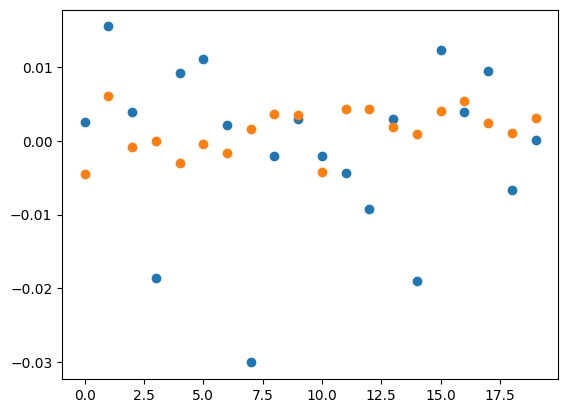

In [9]:
import matplotlib.pyplot as plt
import math

x_values = range(len(y_test))

Y_Predict = models["d+1_lbfgs - 4.pkl"].predict(x_test)

plt.scatter(x_values[0:20],y_test[0:20])
plt.scatter(x_values[0:20],Y_Predict[0:20])
#plt.ylim(-0.02,0.02)
plt.show()

OK, that didn't work